# Imports:

In [24]:
from cv2 import imread
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Test image reading:

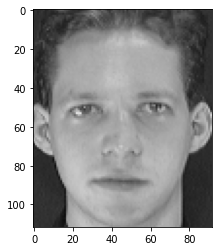

In [15]:
s1_1 = imread('data/s1/1.pgm')
imshow(s1_1)

 # Generate the data matrix and label vector:
 ####  Stack the 400 vectors into a single data matrix.

In [16]:
# Images matrix
images = np.empty(shape=(400, 10304))
# Label matrix (label each image with the sample number.)
labels = np.empty(400)    
count = 0
for i in range(40):
    for j in range(10):
        # Reading the 400 images.
        image = imread(f'data/s{i + 1}/{j + 1}.pgm', -1)
        # Convert every image into a vector of size 10304 (92x112).
        images[count] = image.reshape(10304)
        labels[count] = i + 1
        count += 1

# Reduce the image dimensions:

In [17]:
# Reduce the dimensionality of the given data.
#
# min_threshold: The minimum variance ratio.
# The higher this value is, the more accurate the
# reduced data, but less dimensions are discarded.
def pca(data, min_threshold):
    assert(len(data.shape) == 2)
    assert(0 <= min_threshold <= 1)
    # Center the data at the origin.
    data = data - np.mean(data, axis=0, keepdims=True)
    # Compute the covariance matrix.
    covariance = data.T @ data / data.shape[0]
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    # Sort the eigenvalues in decreasing order.
    sorted_indices = -np.argsort(eigenvalues)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[sorted_indices]
    # Loop over the eigenvalues in decreasing
    # order, and find the minimum number of
    # dimensions such that the variance ratio
    # is not less than the given threshold.
    total_sum = np.sum(eigenvalues)
    partial_sum = 0
    min_dimensions = 0
    for eigenvalue in eigenvalues:
        partial_sum += eigenvalue
        min_dimensions += 1
        if partial_sum / total_sum >= min_threshold:
            break
    # Eigenvectors are stacked row by row, so we
    # limit the column's dimensions.
    reduced_basis = eigenvectors[:, :min_dimensions]
    return data @ reduced_basis

# Reduce the dimensions of the images with
# a minimum variance ratio of 0.8.
images = pca(images, 0.8)
images.shape

(400, 5375)

# Split the dataset into training and test sets:

In [18]:
# Use the odd rows for training and the even rows for testing.
dimensions = images.shape[1]
x_train = np.empty(shape=(200, dimensions))
x_test = np.empty(shape=(200, dimensions))
y_train = np.empty(200)
y_test = np.empty(200)

for i in range(200):
    # Even indices correspond to odd positions.
    # (0, 1), (2, 3), etc.
    x_train[i] = images[2 * i]
    y_train[i] = labels[2 * i]

for i in range(200):
    # Odd indices correspond to even positions.
    # (1, 2), (3, 4), etc.
    x_test[i] = images[2 * i + 1]
    y_test[i] = labels[2 * i + 1]

/var/folders/61/d6wrzm8j38zd27gy1kprdc5m0000gn/T/ipykernel_8859/1726381001.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  x_train[i] = images[2 * i]
/var/folders/61/d6wrzm8j38zd27gy1kprdc5m0000gn/T/ipykernel_8859/1726381001.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  x_test[i] = images[2 * i + 1]


# KNN

In [19]:
# Instantiate the KNN model and fit the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# Make predictions with the KNN model
knn.predict(x_test)

array([ 1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,
        3.,  3.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  6.,
        6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,
        8.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10.,  3., 11., 11.,
       11., 11., 11., 12., 12., 12., 12., 12., 13., 13., 13., 13., 13.,
       14., 14., 14., 14., 14., 15., 15., 15., 15., 15., 16.,  1., 15.,
       16.,  1., 17.,  3., 17., 17., 17., 18., 18., 18., 18., 18., 19.,
       19., 19., 19., 19., 20., 29., 29., 20., 20., 21., 21., 21., 21.,
       21., 22., 22., 22., 22., 22.,  7., 23., 23., 23., 23., 24., 24.,
       24., 24., 24., 25., 25., 25.,  5., 25., 26., 26., 26., 26., 26.,
       27., 27., 27., 27., 27., 28., 28., 28., 37., 28., 29., 29., 29.,
       29., 29., 30., 30., 30., 30., 30., 31., 31., 31., 31., 31., 32.,
       32., 32., 32., 32., 33., 33., 21., 33., 33., 34., 34., 34., 34.,
       34., 25., 15., 25., 25., 35., 36., 36., 36., 36., 36., 14

In [21]:
knn.score(x_test, y_test)

0.89

In [22]:
# Measure the performance of KNN model by calculating the accuracy.
print("Accuracy score %.3f" %knn.score(x_test, y_test))

Accuracy score 0.890


In [23]:
# Confustion matrix of the KNN model.
print(confusion_matrix(y_test, knn.predict(x_test)))

[[5 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 2]]


In [25]:
# Printing the precision and recall, among other metrics for KNN model.
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

         1.0       0.71      1.00      0.83         5
         2.0       1.00      1.00      1.00         5
         3.0       0.71      1.00      0.83         5
         4.0       1.00      1.00      1.00         5
         5.0       0.56      1.00      0.71         5
         6.0       1.00      1.00      1.00         5
         7.0       0.83      1.00      0.91         5
         8.0       1.00      1.00      1.00         5
         9.0       1.00      1.00      1.00         5
        10.0       1.00      0.80      0.89         5
        11.0       1.00      1.00      1.00         5
        12.0       1.00      1.00      1.00         5
        13.0       1.00      1.00      1.00         5
        14.0       0.62      1.00      0.77         5
        15.0       0.71      1.00      0.83         5
        16.0       1.00      0.40      0.57         5
        17.0       1.00      0.80      0.89         5
        18.0       1.00    

# Different splitting of the dataset

In [26]:
# Splitting the dataset into a 70% training set and a 30% testing set.
x_train = np.empty(shape=(280, dimensions))
x_test = np.empty(shape=(120, dimensions))
y_train = np.empty(280)
y_test = np.empty(120)
n = 0
m = 0
k = 0
# Iterate through the 40 samples.
for i in range(40):
    for j in range(7):
      # Chooses the first 7 images of each sample for training.
        x_train[n] = images[k]
        y_train[n] = labels[k]
        k += 1
        n += 1
    
     # Chooses the last 3 images of each sample to be used in testing the model.  
    for j in range(3):
        x_test[m] = images[k]
        y_test[m] = labels[k]
        k += 1
        m += 1

/var/folders/61/d6wrzm8j38zd27gy1kprdc5m0000gn/T/ipykernel_8859/2812329021.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  x_train[n] = images[k]
/var/folders/61/d6wrzm8j38zd27gy1kprdc5m0000gn/T/ipykernel_8859/2812329021.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  x_test[m] = images[k]


# SVM Classifier

In [27]:
# Feature scaling.
sc = StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)

In [28]:
# Instantiate the linear Support Vector Classifier (SVC).
svc_linear = SVC(C=1.0, kernel='linear')
 
# Fit the model
svc_linear.fit(X_train_std, y_train)

SVC(kernel='linear')

In [29]:
# Instantiate the RBF Support Vector Classifier (SVC).
svc_rbf = SVC(C=1.0, kernel='rbf')
 
# Fit the model
svc_rbf.fit(X_train_std, y_train)

SVC()

In [30]:
# Instantiate the polynomial Support Vector Classifier (SVC) with degree 3.
svc_poly = SVC(C=1.0, kernel='poly', degree=3)
 
# Fit the model
svc_poly.fit(X_train_std, y_train)

SVC(kernel='poly')

In [31]:
# Make the predictions for the linear SVM model.
y_predict = svc_linear.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %accuracy_score(y_test, y_predict))

Accuracy score 0.958


In [32]:
# Make the predictions for the RBF SVM model.
y_predict = svc_rbf.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %accuracy_score(y_test, y_predict))

Accuracy score 0.950


In [33]:
# Make the predictions for the polynomial SVM model.
y_predict = svc_poly.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %accuracy_score(y_test, y_predict))

Accuracy score 0.525


In [34]:
# Confusion matrix for the SVM model.
print(confusion_matrix(y_test, y_predict))

[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [35]:
# Printing the precision and recall, among other metrics for the SVM model.
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         1.0       1.00      0.67      0.80         3
         2.0       1.00      0.67      0.80         3
         3.0       1.00      1.00      1.00         3
         4.0       0.60      1.00      0.75         3
         5.0       0.00      0.00      0.00         3
         6.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00         3
         8.0       1.00      1.00      1.00         3
         9.0       1.00      0.33      0.50         3
        10.0       1.00      0.33      0.50         3
        11.0       1.00      0.67      0.80         3
        12.0       0.00      0.00      0.00         3
        13.0       1.00      0.67      0.80         3
        14.0       1.00      0.33      0.50         3
        15.0       0.00      0.00      0.00         3
        16.0       0.00      0.00      0.00         3
        17.0       1.00      1.00      1.00         3
        18.0       1.00    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# Naive Bayes Classifier

In [36]:
# Instantiate the Naive Bayes algorithm.
m = GaussianNB()
#Fit the model
m.fit(x_train,y_train)

GaussianNB()

In [37]:
# Make the predictions for the Naive Bayes algorithm.
ypred = m.predict(x_test)
ypred

array([ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  4.,  4.,  4., 40.,
       40., 40.,  6.,  6.,  6.,  7.,  7.,  7.,  8.,  8.,  8.,  9.,  9.,
        9., 10., 10., 11., 11., 11., 11., 12., 12., 12., 13., 13., 13.,
       14., 11., 14., 15., 15., 15.,  1., 16., 16., 17., 17., 17., 18.,
       18., 18.,  1., 11., 19., 20., 20., 20., 21., 21., 21., 22., 22.,
       22., 23., 23., 23., 24., 24., 24., 25., 25., 25., 26., 26., 26.,
       27., 27., 27., 37., 28., 28., 29., 39., 29., 30., 30., 30., 31.,
       31., 31., 32., 32., 32., 33., 33., 33., 34., 34., 34., 35., 35.,
       35., 36., 36., 36., 37., 37., 37., 38., 38., 38., 39., 39., 39.,
       40., 40., 40.])

In [38]:
# Confusion matrix for Naive Bayes
cm = confusion_matrix(y_test, ypred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


In [39]:
# Measure the performance of Naive Bayes algorithm by calculating the accuracy
ac = accuracy_score(y_test,ypred)
print("Accuracy\n",ac)

Accuracy
 0.9166666666666666
